In [23]:
import matplotlib.pyplot as plt
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd
import seaborn as sns
import sklearn
import scipy

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
Nokia1_file = "/content/drive/MyDrive/Second Sem/Nokia1.mp3"
Nokia2_file = "/content/drive/MyDrive/Second Sem/Nokia2.mp3"

In [4]:
ipd.Audio(Nokia1_file)

In [5]:
ipd.Audio(Nokia2_file)

In [6]:
Nokia1, sr = librosa.load(Nokia1_file)
Nokia2, _ = librosa.load(Nokia2_file)

In [7]:
Nokia1.shape

(154944,)

In [8]:
# duration in seconds of 1 sample
sample_duration = 1 / sr
print(f"One sample lasts for {sample_duration:6f} seconds")

One sample lasts for 0.000045 seconds


In [9]:
# total number of samples in audio file
tot_samples = len(Nokia1)
tot_samples

154944

**Spectral centroids**

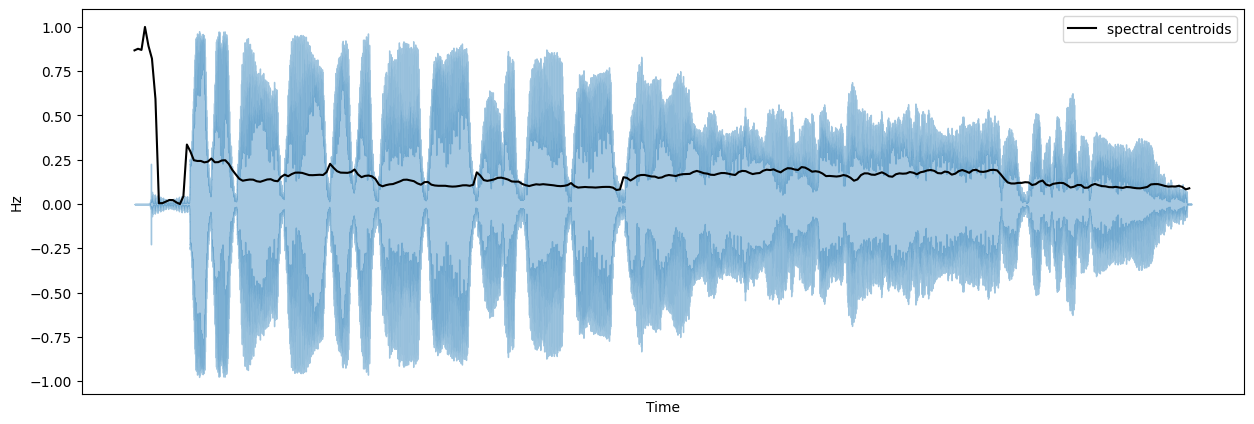

In [15]:
from sklearn import preprocessing
# compute the spectral centroid for each frame in a signal
spectral_centroids = librosa.feature.spectral_centroid(y=Nokia1, sr=sr)[0]
spectral_centroids.shape

# compute the time variable for visualization
frames = range(len(spectral_centroids))
f_times = librosa.frames_to_time(frames)

# an auxiliar function to normalize the spectral centroid for visualization
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

plt.figure(figsize=(15,5))
plt.subplot(1, 1, 1)
librosa.display.waveshow(Nokia1, sr=sr, alpha=0.4)
plt.plot(f_times, normalize(spectral_centroids), color='black', label='spectral centroids')
plt.ylabel('Hz')
plt.xticks([])
plt.legend()

**Spectral contrast**

In [17]:
y_harmonic, y_percussive = librosa.effects.hpss(Nokia1)

Text(0.5, 1.0, 'Spectral contrast')

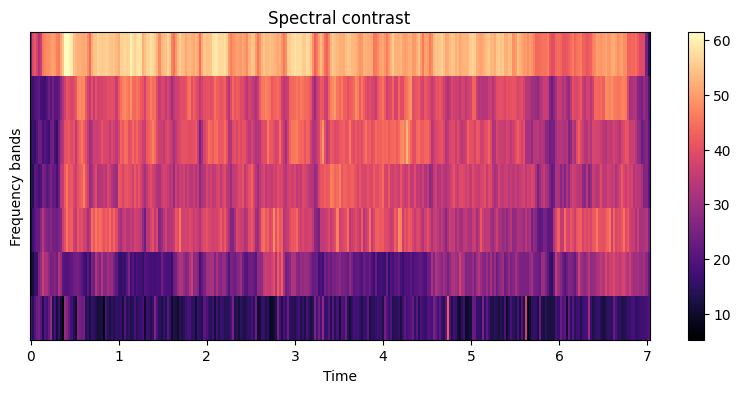

In [19]:
contrast = librosa.feature.spectral_contrast(y=y_harmonic,sr=sr)

plt.figure(figsize=(10,4))
librosa.display.specshow(contrast, x_axis='time')
plt.colorbar()
plt.ylabel('Frequency bands')
plt.title('Spectral contrast')

**spectral rolloff**

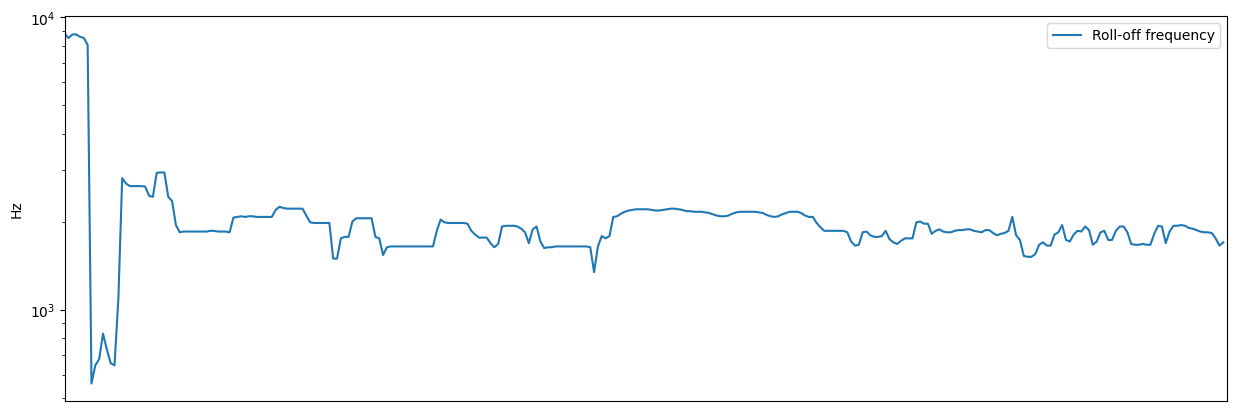

In [20]:
rolloff = librosa.feature.spectral_rolloff(y=Nokia1, sr=sr)

plt.figure(figsize=(15,5))
plt.semilogy(rolloff.T, label='Roll-off frequency')
plt.ylabel('Hz')
plt.xticks([])
plt.xlim([0, rolloff.shape[-1]])
plt.legend()

In [24]:
rolloff_mean = np.mean(rolloff)
rolloff_std = np.std(rolloff)
rolloff_skew = scipy.stats.skew(rolloff,axis = 1)[0]
print('Mean: ' + str(rolloff_mean))
print('STD: ' + str(rolloff_std))
print('Skewness: ' + str(rolloff_skew))

Mean: 2054.004631420173
STD: 1049.0879922011452
Skewness: 5.470851025284581


Mel-frequency cepstral coefficients (MFCCs)

Text(0.5, 1.0, 'MFCCs')

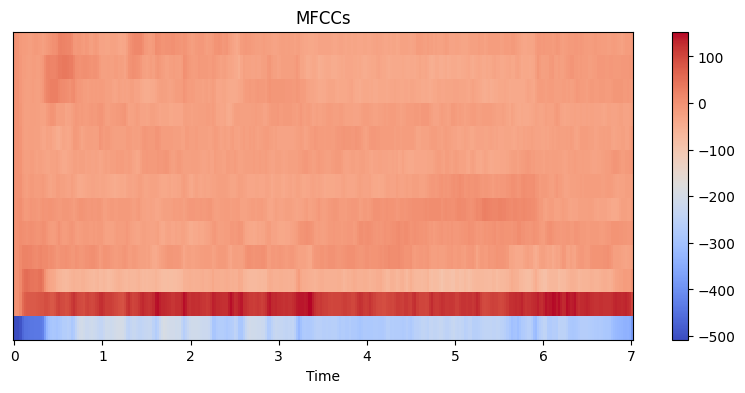

In [25]:
mfccs = librosa.feature.mfcc(y=y_harmonic, sr=sr, n_mfcc=13)

plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCCs')